# An Introduction to Statistical Learning

## 2. Statistical Learning

### Imports

In [1]:
import numpy as np
from matplotlib.pyplot import subplots
import pandas as pd
from pathlib import Path

### 2.3 Lab: Introduction to Python

This is not an exhautive attempt at all of the coding exercises in this section. I simply picked the ones that I wanted to brush up on, or had not seen executed in the way it was detailed in the book before.

#### 2.3.3 Introduction to Numerical Python

In [2]:
np.random.normal(size=50)

array([-9.58193062e-01,  3.99306630e-01,  8.02131503e-01, -2.09683417e+00,
       -6.89893982e-02,  3.01131827e+00, -9.62511629e-01,  1.11666610e+00,
       -2.14515331e+00, -2.24730832e-03, -2.79756912e-01, -1.64617241e+00,
        1.96057101e+00, -3.67916293e-01,  1.92183570e+00, -7.09647214e-01,
       -1.17503476e+00,  4.89163577e-01,  5.91038797e-01,  1.25187827e+00,
        5.05748283e-01, -7.24670735e-01, -9.27123376e-01, -4.90504613e-01,
       -5.66840469e-01,  2.35349494e-01, -7.95816917e-01, -8.70551608e-02,
        5.19465841e-01, -3.68796711e-02, -1.14844442e+00, -1.41789760e+00,
       -3.50984702e-01,  1.36780538e+00,  1.36764646e+00, -7.69315084e-01,
        3.85085849e-01,  8.42506343e-01, -3.20684411e-01, -1.25289112e+00,
       -2.11386315e+00,  1.31485590e-01, -7.30096029e-01, -3.19418277e-01,
       -6.36384312e-02,  3.51837445e-01,  9.27903053e-01, -2.01620338e+00,
       -1.86936706e+00,  1.61373938e-01])

By default, this generates random normal variables with mean (loc) o, and standard deviation (scale) 1.

In [3]:
x = np.random.normal(loc=5, scale=3, size=50)

In [4]:
x.mean()

4.9868478382684085

In [5]:
y = x + np.random.normal(loc=50,  scale=1, size=50)

In [6]:
np.corrcoef(x,y)

array([[1.        , 0.96909994],
       [0.96909994, 1.        ]])

This function computes the correlation matrix between x and y. The off-diagonal elements give the correlation between x and y.

In [7]:
np.random.default_rng()

Generator(PCG64) at 0x13B146F80

Use this function to set a random seed before generating random data so that our code yields the same results. Below, the object 'rng' essentially has all the random number generating methods found in np.random.

In [8]:
rng = np.random.default_rng(1303)
print(rng.normal(scale=5, size=2))
rng_2 = np.random.default_rng(1303)
print(rng_2.normal(scale=5, size=2))

[ 4.09482632 -1.07485605]
[ 4.09482632 -1.07485605]


If we construct a 10x3 matrix of N(0,1) random variables we can compute its row sums.

Note: N(0,1) refers to a specific type of normal distribution in probability and statistics.
- N: Refers to the fact that it's a normal (or Gaussian) distribution
- 0: The mean of the distribution
- 1: The variance of the distribution

In [9]:
X = rng.standard_normal((10,3))

In [10]:
X

array([[-2.03072919,  0.22681229, -0.82806113],
       [-0.94971965,  0.09748025,  1.13071035],
       [-0.503177  , -1.6146684 , -0.51143783],
       [ 1.30857567, -0.60106271, -1.04358358],
       [-0.77787108, -0.03621124, -2.366124  ],
       [-0.12532525, -1.04473968, -0.46412883],
       [ 0.33555586, -0.11933931, -0.19707608],
       [-0.35307465,  0.09562671,  0.83201011],
       [ 1.78919398, -3.25891725,  1.06043415],
       [-0.69168156, -1.16488556,  0.99099849]])

Since arrays are row-major ordered, the first axis (i.e. axis=0) refers to its rows

In [11]:
X.mean(axis=0)

array([-0.19982529, -0.74199049, -0.13962583])

This yields the same results:

In [12]:
X.mean(0)

array([-0.19982529, -0.74199049, -0.13962583])

In [13]:
X.mean(axis=1)

array([-0.87732601,  0.09282365, -0.87642774, -0.11202354, -1.06006877,
       -0.54473125,  0.00638016,  0.19152072, -0.13642971, -0.28852288])

#### 2.3.4 Graphics

The subplots function returns a tuple of length two: a figure object as well as the relevant axes object.

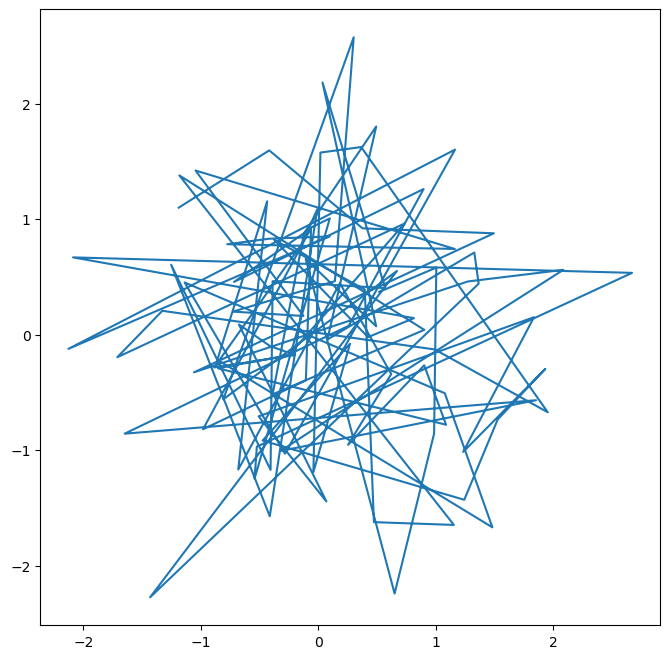

In [14]:
fig, ax = subplots(figsize=(8,8))
x = rng.standard_normal(100)
y = rng.standard_normal(100)
ax.plot(x, y,);

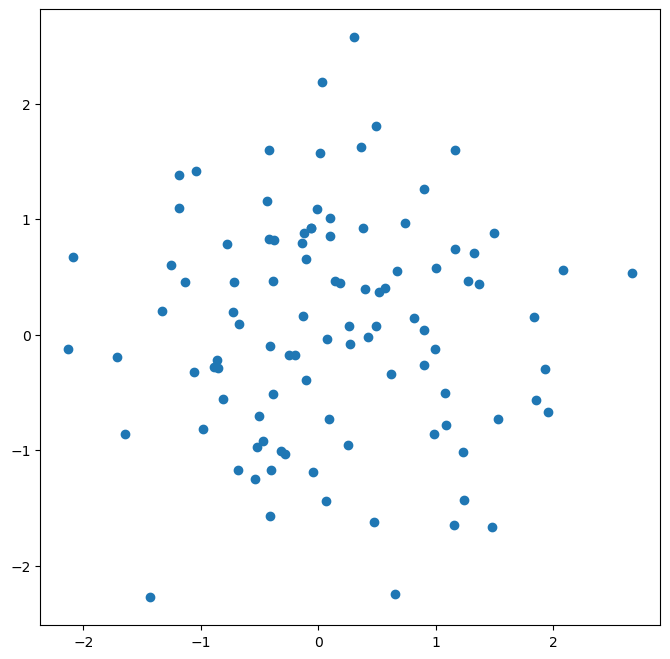

In [15]:
fig, ax = subplots(figsize=(8,8))
ax.plot(x, y, 'o');

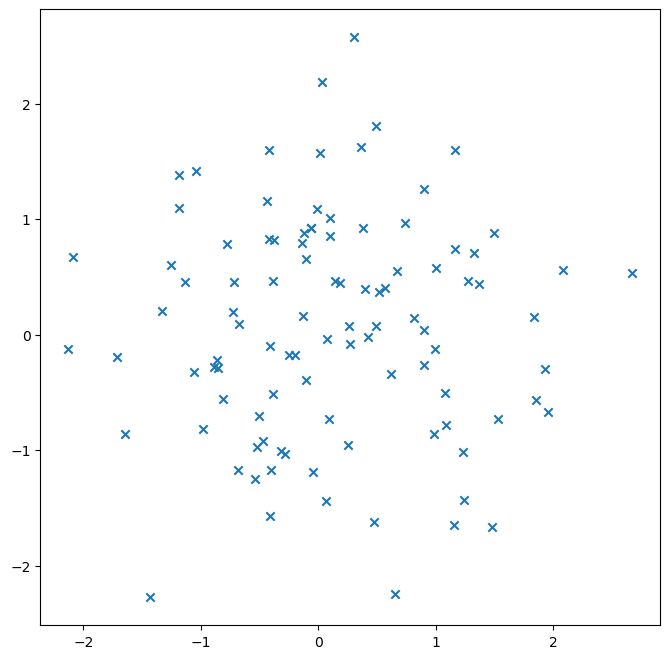

In [16]:
fig, ax = subplots(figsize=(8,8))
ax.scatter(x, y, marker = 'x');

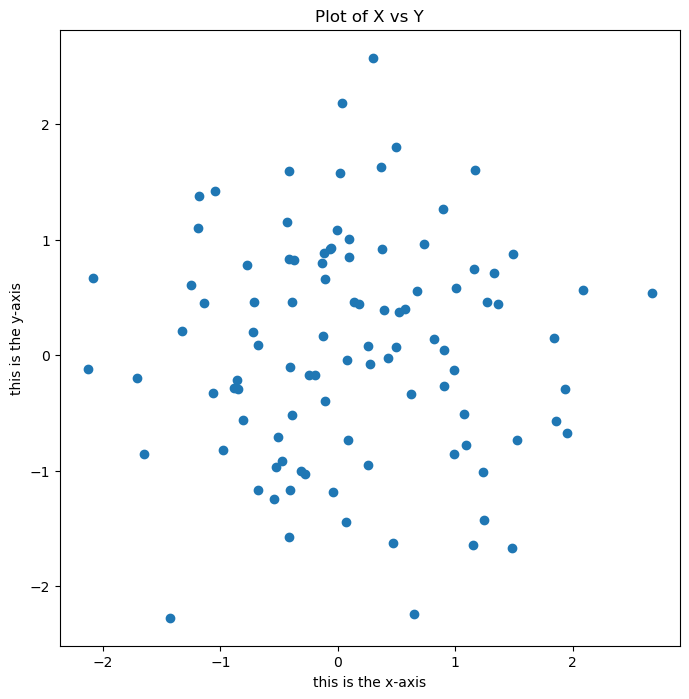

In [17]:
fig, ax = subplots(figsize=(8,8))
ax.scatter(x, y, marker='o')
ax.set_xlabel("this is the x-axis")
ax.set_ylabel("this is the y-axis")
ax.set_title("Plot of X vs Y");

Having access to the object 'fig' means that we can go in and change some aspects and the redisplay it:

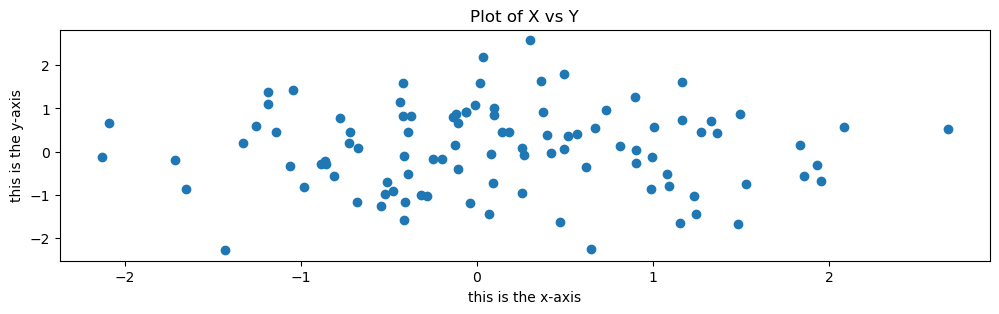

In [18]:
fig.set_size_inches(12,3)
fig

To create several plots witin a figure, we can pass additional arguments to subplots(). When doing so, there is often a relationship between the axes in the plots (e.g. all the plots may have a common x-axis). The subplots() function can automatically handle this situation when passed the keyword argument sharex=True.

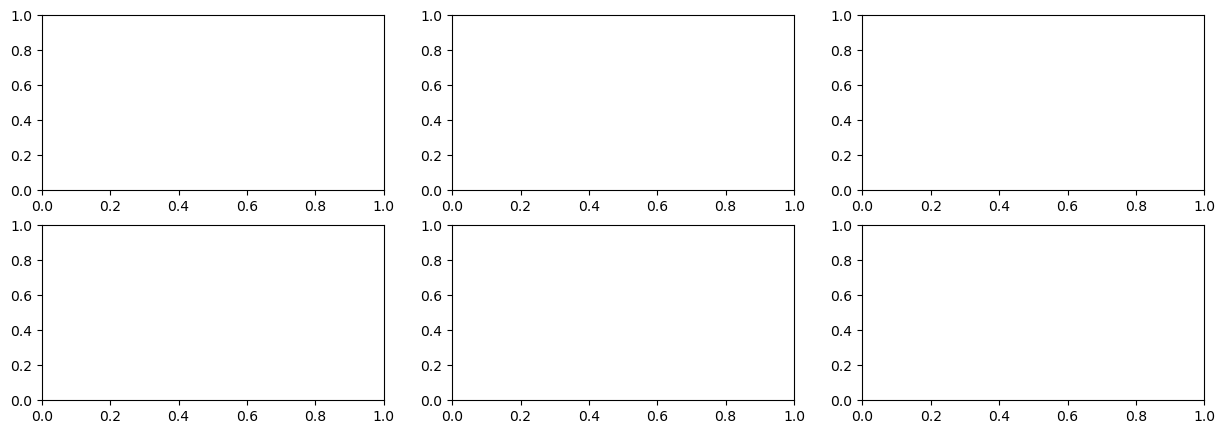

In [19]:
fig, axes = subplots(nrows=2,
                     ncols=3,
                     figsize=(15,5))

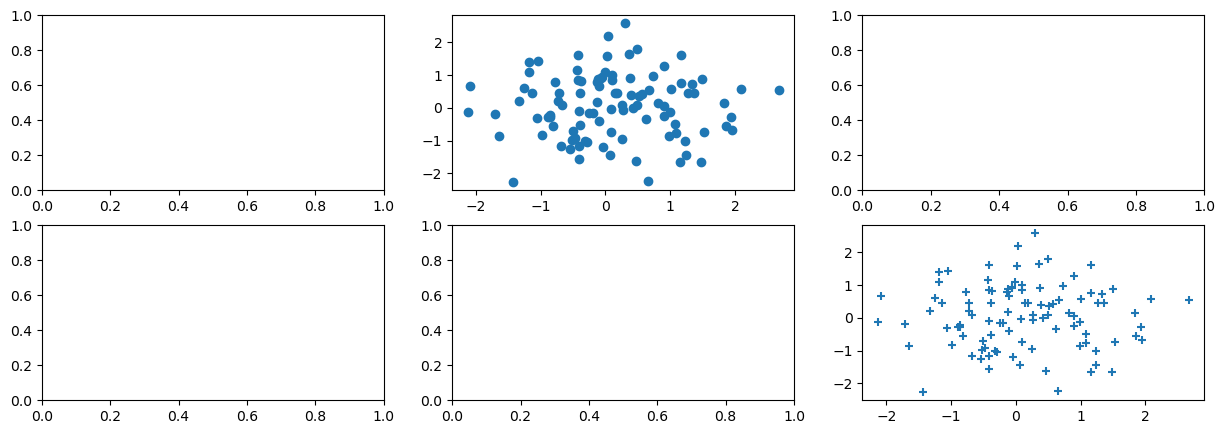

In [20]:
axes[0,1].plot(x, y, 'o')
axes[1,2].scatter(x, y, marker='+')
fig

To save the output figure, use the savefig() method:

fig.savefig("Figure.pdf", dpi=200)

We can continue to modify 'fig' using step-by-step updates; for example, we can modify the range of the x-axis, re-save the figure and redisplay it.

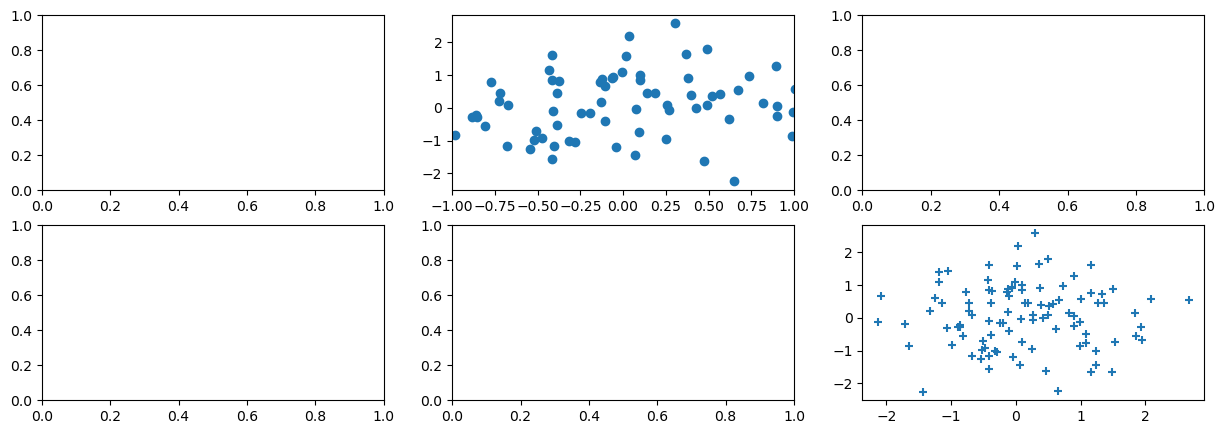

In [21]:
axes[0, 1].set_xlim([-1, 1])
#fig.savefig("Figure_updated.jpg")
fig

The ax.contour() method produces a contour plot in order to represent three-dimensional data, similar to a topographical map. It takes three arguments:

- A vector of x values (the first dimension)
- A vector of y values (the second dimension)
- A matrix whose elements correspond to the z value (the third dimension) for each pair of (x, y) coordinates

To create x and y, we can use the command np.linspace(a, b, n) which returns a vector of n numbers starting at a and ending at b.

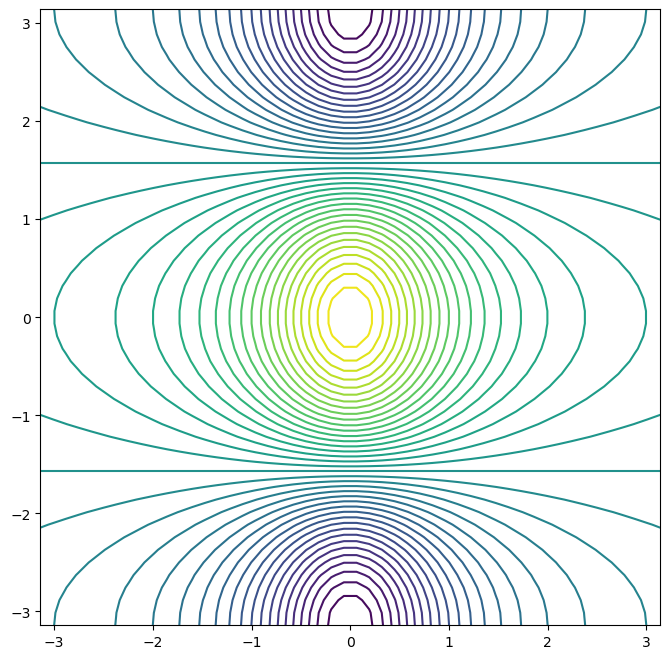

In [22]:
fig, ax = subplots(figsize=(8,8))
x = np.linspace(-np.pi, np.pi, 50)
y = x
f = np.multiply.outer(np.cos(y), 1 / (1 + x**2))
ax.contour(x, y, f, levels=45);

We can increase the resoltuion by adding more levels to the image.

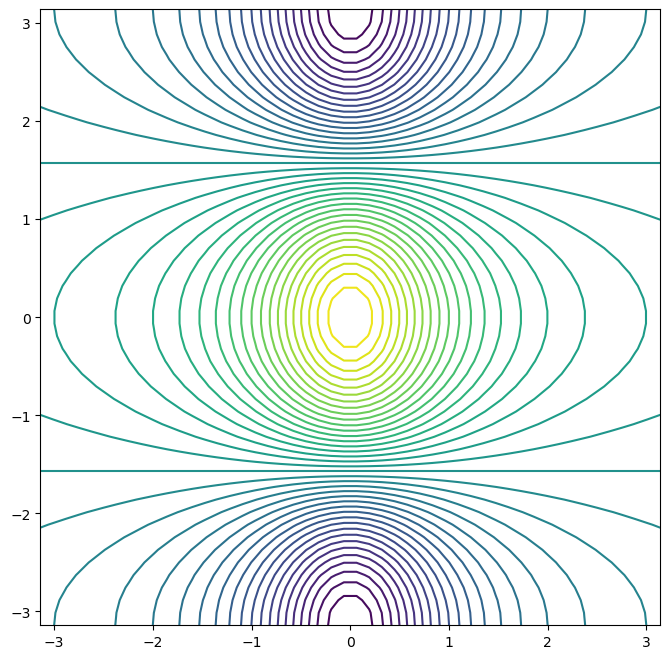

In [23]:
fig, ax = subplots(figsize=(8,8))
ax.contour(x, y, f, levels=45);

The ax.imshow() method is similar to ax.contour(), excpet that it produces a colour-coded plot whose colours depend on the z value. This is known as a heatmap, and is sometimes used to plot temperature in weather forecasts.

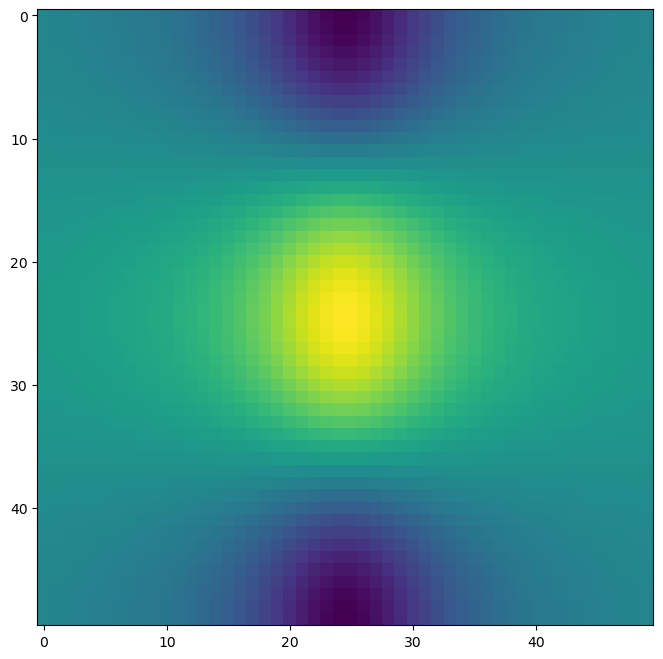

In [24]:
fig, ax = subplots(figsize=(8,8))
ax.imshow(f);

#### 2.3.8 For Loops

I do not routinely use some of the methods here, so recorded them for my own benefit.

In [25]:
total = 0
for value in [2, 3, 19]:
    total += value
print('Total is: {0}'.format(total))

Total is: 24


In [26]:
total = 0
for value in [2, 3, 19]:
    for weight in [3, 2, 1]:
        total += value * weight
print('Total is: {0}'.format(total))

Total is: 144


A more common task may be to sum over (value, weight) pairs. For example, to compute the the average value of a random variable that takes on possible values 2, 3 or 19 with probability 0.2, 0.3, and 0.5 respectively we would compute the weighted sum.

In [27]:
total = 0
for value, weight in zip([2, 3, 19],
                         [0.2, 0.3, 0.5]):
    total += weight * value
print('Weighted average is {0}'.format(total))

Weighted average is 10.8


#### String formatting

Inserting the value of something into a string is a common task, , made simple using some of the powerful string formatting tools in Python. Many data cleaning tasks involve manipulating and programmatically producing strings.

In [28]:
rng = np.random.default_rng(1)
A = rng.standard_normal((127, 5))
M = rng.choice([0, np.nan], p=[0.8, 0.2], size=A.shape)
A += M
D = pd.DataFrame(A, columns = ['food',
                               'bar',
                               'pickle',
                               'snack',
                               'popcorn'])
D[:3]

,food,bar,pickle,snack,popcorn
0,0.345584,0.821618,0.330437,-1.303157,NaN
1,NaN,-0.536953,0.581118,0.364572,0.294132
2,NaN,0.546713,NaN,-0.162910,-0.482119


In [29]:
for col in D.columns:
    template = 'Column "{0}" has {1:.2%} missing values'
    print(template.format(col, np.isnan(D[col]).mean()))

Column "food" has 16.54% missing values
Column "bar" has 25.98% missing values
Column "pickle" has 29.13% missing values
Column "snack" has 21.26% missing values
Column "popcorn" has 22.83% missing values


More (complex) examples here: https://docs.python.org/3/library/string.html

#### 2.3.9 Additional Graphical and Numerical Summaries

In [30]:
# Read in the file from a previous exercise.

file_path = Path('Data') / 'Auto.csv'
Auto = pd.read_csv(file_path)

In [31]:
# The below won't work as Python doesn't know to look in the Auto data for the variables in the plot() method.

# fig, ax = subplots(figsize=(8,8))
# ax.plot(Auto['horsepower'], Auto['mpg'], 'o');

We can address this by accessing the columns directly.

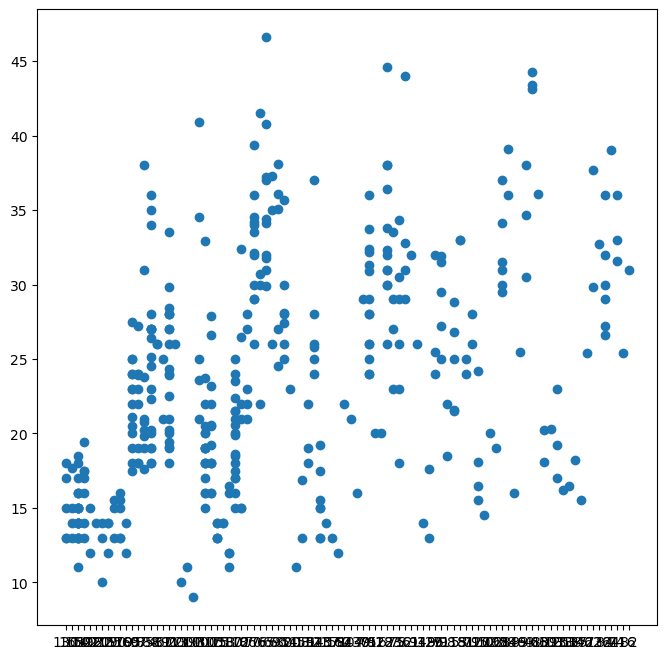

In [32]:
fig, ax = subplots(figsize=(8,8))
ax.plot(Auto['horsepower'], Auto['mpg'], 'o');

Alternatively, we can use the plot() method with the call Auto.plot(). In this way, variables can be accessed by name. The plot methods of a dataframe return an axes which we can use to update the plot.

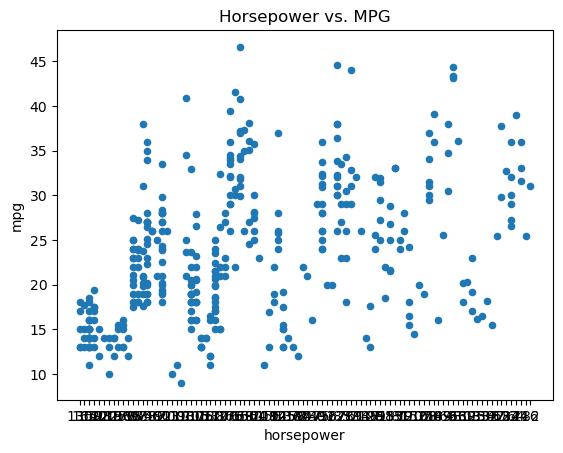

In [33]:
ax = Auto.plot.scatter('horsepower', 'mpg')
ax.set_title('Horsepower vs. MPG');

To save the figure, we can do so by accessing the 'figure' attribute.

In [34]:
# fig = ax.figure
# fig.savefig('horsepower_mpg.png')

We can further instruct the data frame to plot to a particular axes object. Below, the plot() methid will return the modified axes we passed in as an argument.

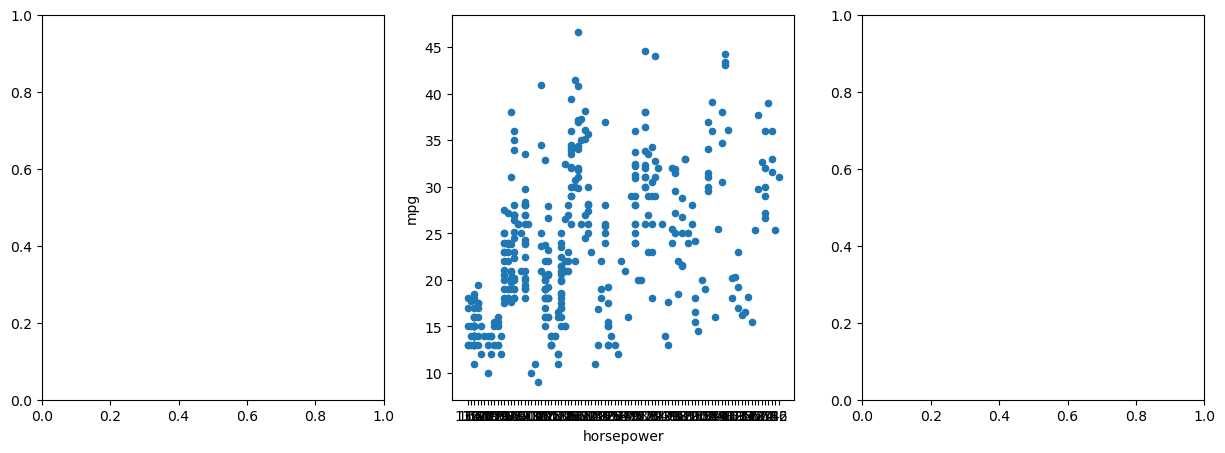

In [35]:
fig, axes = subplots(ncols = 3, figsize=(15,5))
Auto.plot.scatter('horsepower', 'mpg', ax=axes[1]);

The values in 'cylinders' are being treated as a quantitative variables. However, since there are only a small number of possible values for this variable (5), we may wish to treat it as qualitative.

In [36]:
Auto.cylinders.dtype

dtype('int64')

In [37]:
Auto.cylinders.value_counts()

cylinders
4    203
8    103
6     84
3      4
5      3
Name: count, dtype: int64

In [38]:
Auto.cylinders = pd.Series(Auto.cylinders, dtype='category')
Auto.cylinders.dtype

CategoricalDtype(categories=[3, 4, 5, 6, 8], ordered=False, categories_dtype=int64)

Now that cylinders is qualitative, we can display it using the boxplot() method.

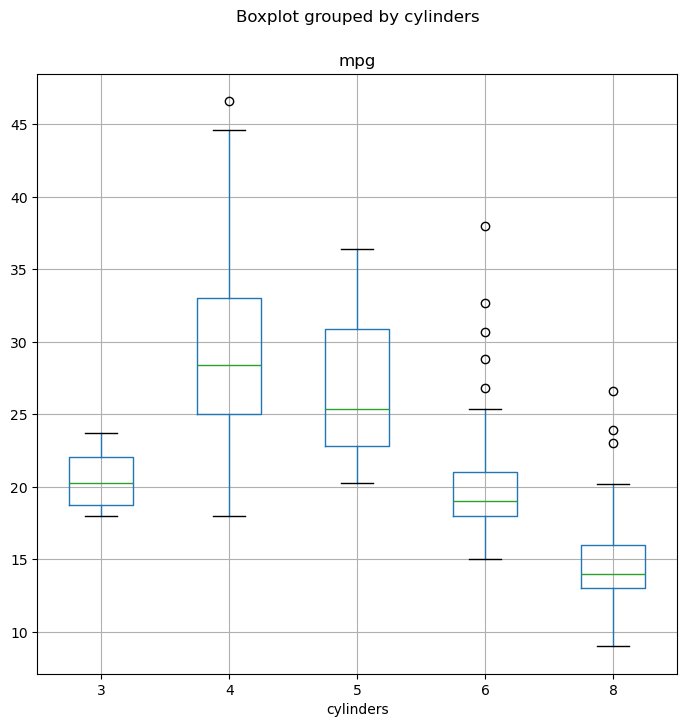

In [39]:
fig, ax = subplots(figsize=(8,8))
Auto.boxplot('mpg', by='cylinders', ax=ax);

The hist() method can be used to plot a histogram.

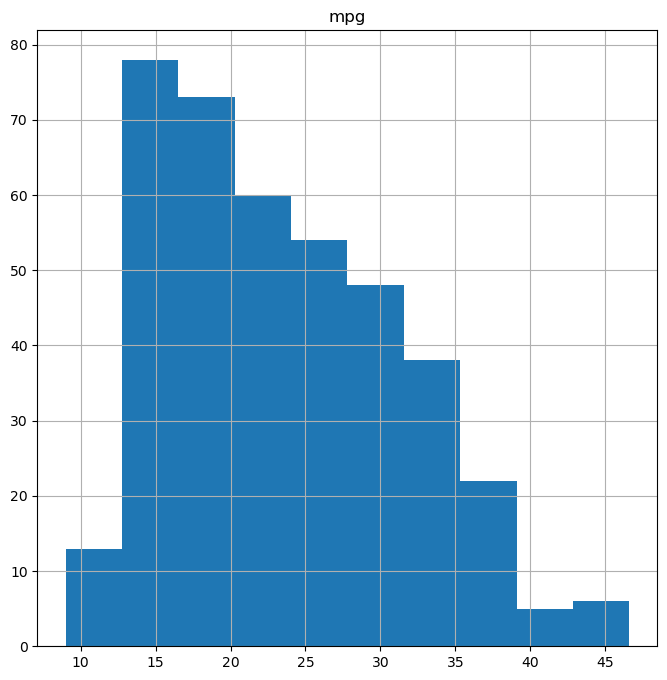

In [40]:
fig, ax = subplots(figsize=(8, 8))
Auto.hist('mpg', ax=ax);

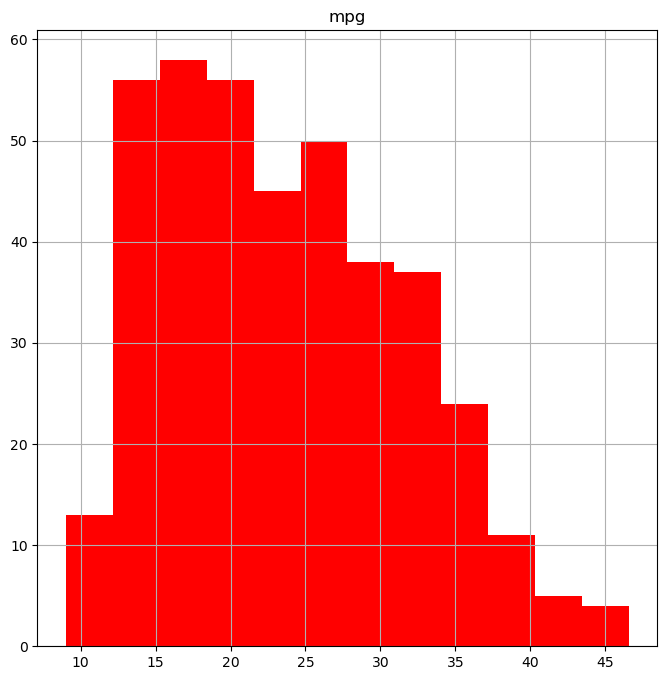

In [41]:
fig, ax = subplots(figsize=(8, 8))
Auto.hist('mpg', color='red', bins=12, ax=ax);

We can use the pd.plotting.scatter_matrix() function to create a scatterplot matrix to visualise all of the pairwise relationships between the columns in a dataframe.

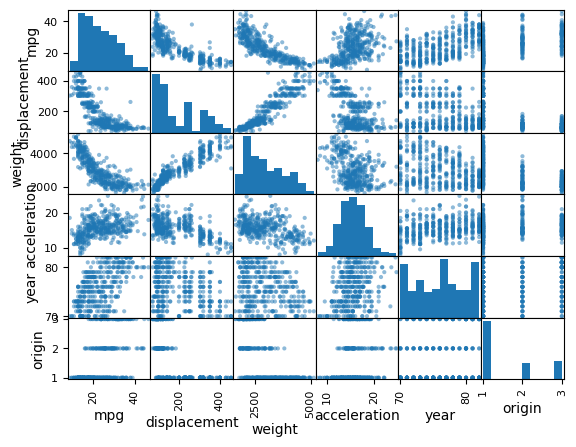

In [42]:
pd.plotting.scatter_matrix(Auto);

We can also produce scatterplots for a subset of the variables.

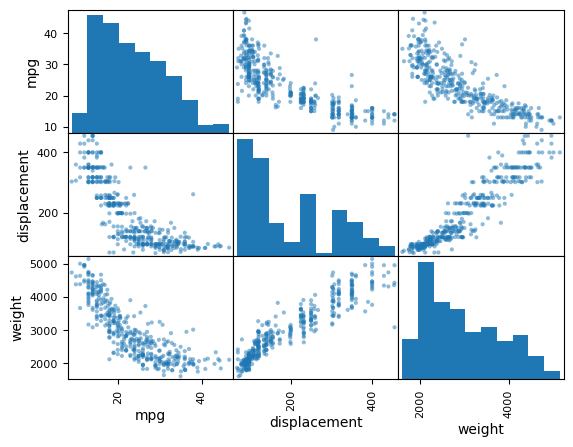

In [43]:
pd.plotting.scatter_matrix(Auto[['mpg',
                                 'displacement',
                                 'weight']]);

### 2.4 Exercises

#### Conceptual

1. For each of parts (a) through (d), indicate whether we would generally expect the performance of a flexible statistical learning method to be better or worse than an inflexible method. Justify your answer.
   
* (a) The sample size n is extremely large, and the number of predictors p is small.
* (b) The number of predictors p is extremely large, and the number of observations n is small.
* (c) The relationship between the predictors and response is highly non-linear.
* (d) The variance of the error terms, i.e. σ2 = Var(ε), is extremely high.

- (a) *A flexible method would be better than an inflexible one.* Given that flexible approaches rely on a large number of observations in order to obtain an accurate estimation of *f*, this scenario would suggest that such a statistical learning method would be appropriate. Flexible methods, which can fit complex patterns, benefit from large datasets because the risk of overfitting is reduced. The large amount of data provides the requisite information to accurately estimate the underlying relationship between the predictors and response variable.

- (b) *A flexible method would be worse than an inflexible one.* Working with a smaller number of observations, it would be wise to opt for an inflexible method in this scenario. If there is a small amount of training data for a flexible method to work with, it could overfit the data and the model would not generalise well to unseen data. This is known as the 'curse of dimensionality' where the model has too many degrees of freedom. The model becomes highly complex with a large number of predictors relative to the number of observations.

- (c) *A flexible method would be better than an inflexible one.* Non-parametric approaches are better able to model complex, non-linear relationships between predictors and response variables. An inflexible method runs the risk of underfitting the data and failing to capture the underlying patterns.

- (d) *A flexible method would be worse than an inflexible one.* When the variance in error terms is high, this could indicate that there is a lot of noise in the data, possibly obscuring the true underlying relationship between the predictors and the response variables. Flexible methods are more likely to overfit the noise when the error variance is high. In contrast, inflexible methods with fewer degrees of freedom will 'smooth out' the noise. With high error variance, the benefit of reducing this by using a simpler, inflexible model outweighs the potential bias introduced by not capturing the complexity of the relationship.

2. Explain whether each scenario is a classification or regression problem, and indicate whether we are most interested in inference or prediction. Finally, provide n and p.
   
* (a) We collect a set of data on the top 500 firms in the US. For each firm we record profit, number of employees, industry and the CEO salary. We are interested in understanding which factors affect CEO salary.
  
* (b) We are considering launching a new product and wish to know whether it will be a success or a failure. We collect data on 20 similar products that were previously launched. For each product we have recorded whether it was a success or failure, price charged for the product, marketing budget, competition price, and ten other variables.
  
* (c) We are interested in predicting the % change in the USD/Euro exchange rate in relation to the weekly changes in the world stock markets. Hence we collect weekly data for all of 2012. For each week we record the % change in the USD/Euro, the % change in the US market, the % change in the British market, and the % change in the German market.

* (a) This is a regression problem as we are seeking to understand the relationship between the predictors (profit, number of employees, and industry) with the response (CEO salary). Both are continuous variables. Given that we are trying to model the relationship, rather than predict the CEO's salary, this means that we are most interested in inference. Here, n is 500 (number of firms) and p is 3 (profit, number of employees, and industry).
  
* (b) This is a classification problem, as the product will be assigned one of two categorical variables: 'success' or 'failure'. We are most interested in prediction, using the data collected to understand whether it will succeed or not. Here, n is 20 (the number of previous products) and p is 13 (price, marketing budget, competition price and 10 other factors).
  
* (c) This is a regression problem as we are trying to predict a percentage. Here, we are interested in both inference (understanding how the % change in the USD/Euro, the % change in the US market, the % change in the British market, and the % change in the German market impact the exchange rate) as well as prediction (a desire to know what the specific percentage might be). Here, n is 52 (the USD/Euro exchange rate for the year) and p is 3  the % change in the US market, the % change in the British market, and the % change in the German market.

3. We now revisit the bias-variance decomposition.

* (a) Provide a sketch of typical (squared) bias, variance, training error, test error, and Bayes (or irreducible) error curves, on a single plot, as we go from less flexible statistical learning methods towards more flexible approaches. The x-axis should represent the amount of flexibility in the method, and the y-axis should represent the values for each curve. There should be five curves. Make sure to label each one.

In [44]:
bi_var = {
    'bias': [1, 0.3, 0.1, 0, 0],
    'var': [0.1, 0.2, 0.4, 0.6, 1.5],
    'training_err': [1.5, 1, 0.8, 0.5, 0.1],
    'test_err': [2, 1.2, 1.4, 1.8, 2.5],
    'bayes_err': [0.8, 0.8, 0.8, 0.8, 0.8],
    'flex': [5, 10, 15, 20, 25]
}

In [45]:
bi_var

{'bias': [1, 0.3, 0.1, 0, 0],
 'var': [0.1, 0.2, 0.4, 0.6, 1.5],
 'training_err': [1.5, 1, 0.8, 0.5, 0.1],
 'test_err': [2, 1.2, 1.4, 1.8, 2.5],
 'bayes_err': [0.8, 0.8, 0.8, 0.8, 0.8],
 'flex': [5, 10, 15, 20, 25]}

In [46]:
bi_var_df = pd.DataFrame(bi_var)

In [47]:
bi_var_df

,bias,var,training_err,test_err,bayes_err,flex
0,1.0,0.1,1.5,2.0,0.8,5
1,0.3,0.2,1.0,1.2,0.8,10
2,0.1,0.4,0.8,1.4,0.8,15
3,0.0,0.6,0.5,1.8,0.8,20
4,0.0,1.5,0.1,2.5,0.8,25


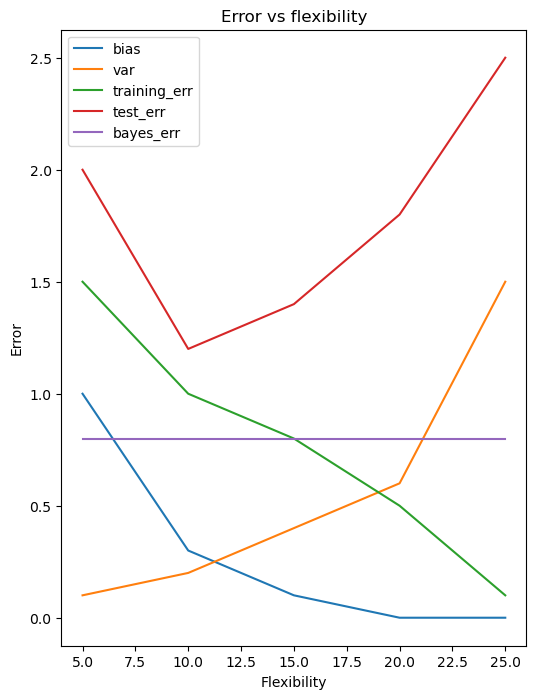

In [48]:
fig, ax = subplots(figsize=(6,8))

col_to_plot = ['bias', 'var', 'training_err', 'test_err', 'bayes_err']

for col in col_to_plot:
    bi_var_df.plot('flex', col, ax=ax)

ax.set_xlabel('Flexibility')
ax.set_ylabel('Error')
ax.set_title('Error vs flexibility')
ax.legend(col_to_plot)

- (b) Explain why each of the five curves has the shape displayed in part (a).

    - Bias decreases gradually as flexibility increases.
    - Variance initially decreases and then increases as flexibility increases.
    - Training error decreases steadily as flexibility increases.
    - Test error decreases initially, reaches a minimum point, and then increases due to overfitting.
    - Bayes error remains constant regardless of model flexibility.

4. You will now think of some real-life applications for statistical learn- ing.

- (a) Describe three real-life applications in which classification might be useful. Describe the response, as well as the predictors. Is the goal of each application inference or prediction? Explain your answer.

- 1. Categorising tweets by their content. Here, the predictors would be the vocabulary within the tweet. The response would be a binary decision about whether the tweet was representative of the specified topic or not (for example, natural disasters). This is a prediction problem.
- 2. Sentiment analysis. Here, the predictors would be the specific words and phrases which would indicate positive or negative sentiment. The response would be whether the sentiment of the text is positive or negative. This is a prediction problem.
- 3. Identifying things from an image. Here, the predictors would be data inherent in the images (e.g. pixel values and colour patterns) that the model had been trained on. This could be used to monitor bird populations, with a machine counting the different varities of bird that are seen visiting a specific place. Again, this is a prediction problem.

- (b) Describe three real-life applications in which regression might be useful. Describe the response, as well as the predictors. Is the goal of each application inference or prediction? Explain your answer.

- 1. House price prediction. The response is the house price and the predictors would include the number of bedrooms, age of the property, floor space in square feet etc. This is a prediction problem. However, the model could be used for the purposes of inference when trying to understand how each predictor affects the price. For example, we could infer the average increase in price per additional bedroom.
- 2. Population forecasts. The response here is the total number of people. Predictors would include births, deaths, and migration. This is another example of a prediction problem. Again, inference could be used here to understand the relative impact of each predictor.
- 3. Calculating salaries of employees. The response here would be the salary. Predictors would include years of experience and quaifications. This is another example of a prediction problem. The model could be used for inference, too. For example, we could infer the average salary increase per additional year of experience.

- (c) Describe three real-life applications in which cluster analysis might be useful.

- 1. Grouping customers based on their buying habits. This could include purchase frequency and categories of products bought. This way, specific customers could be targetted with personalised marketing materials that relate to their typical shopping basket.
- 2. Grouping plants based on their qualities. If farmers are looking for the best yields on their crops, they could be clustered based on a range of measurements, with those meeting certain criteria used in the future. These could include growth rates, yields, and resistance to pests.
- 3. When grouping specific regions of a country. If they have common characteristics in terms of demographics, it could be useful for local authorities to undersatnd this so they can share best practice when it comes to making positive changes in these communities. These demographic characteristics might include level of education, income levels, and age distributuon.

5. What are the advantages and disadvantages of a very flexible (versus a less flexible) approach for regression or classification? Under what circumstances might a more flexible approach be preferred to a less flexible approach? When might a less flexible approach be preferred?

Reasons that we might prefer a less flexible approach include:

- If we are mainly interested in inference, then a less flexible model will be more interpretable. On the contrary, less flexible models can make it difficult to understand how any indicidual predictor is associated with the response.
  
- If prediction is our goal, then a more flexible approach, which can generate a much wider range of shapes to estimate _f_, may help us to better model the relationships in the data and thus provide more accurate predictions. We may be less interested in interpreting the results if the model provides us with the desired level of flexibility.

6. Describe the differences between a parametric and a non-parametric statistical learning approach. What are the advantages of a parametric approach to regression or classification (as opposed to a non-parametric approach)? What are its disadvantages?

Parametric methods involve a two-step model-based approach. First, we make an assumption about the functional form, or shape of *f*. For example one very simple assumption is that *f* is linear. Second, we need a procedure that uses the training data to fit or train the model (e.g. (ordinary) least squares). The parametric model-based approach reduces the problem of estimating *f* down to one of estimating a set of parameters. This simplifies the problem of estimating *f* as it reduces it to estimating a set of parameters such as $\beta_0$, $\beta_1$,... $\beta_p$ etc. If we have a small number of observations, then a parametric approach would be appropriate as it can do a reasonable job of modelling the data without overfitting. It is often the case that they are easier to interpret and understand. However, due to their limited flexibility, they may not capture complex relationships in the dtaa if the true relationship is not well-reperesented by the chosen functional form.

Non-parametric models do not make assumptions about the functional form of *f*. Instead, they seek an estimate of *f* that gets as close to the data points as possible. The fact that they don't assume the form of *f* means that non-parametric models have an advatage over parametric approaches in that they have the potential to fit a wider range of possible shapes for *f*. Any parametric approach brings with it the possibility that the functional form used to estimate *f* is very different from the true *f*, in which case the resulting model will not fit the data well. One of the disadvantages with non-parametric approaches is that since they do not reduce the problem of estimating *f* to a small number of parameters, a very large number of observations is required in order to obtain an accurate estimate of *f*. Furthermore, they are prone to overfitting, especially with noisy data, since they pick up fine details in the trainign data.

7. The table below provides a training data set containing six observations, three predictors, and one qualitative response variable.

In [49]:
data = {
    'obs': [1,2,3,4,5,6],
    'x1': [0,2,0,0,-1,1],
    'x2': [3,0,1,1,0,1],
    'x3': [0,0,3,2,1,1],
    'Y': ['Red', 'Red', 'Red', 'Green', 'Green', 'Red']
}

In [50]:
data

{'obs': [1, 2, 3, 4, 5, 6],
 'x1': [0, 2, 0, 0, -1, 1],
 'x2': [3, 0, 1, 1, 0, 1],
 'x3': [0, 0, 3, 2, 1, 1],
 'Y': ['Red', 'Red', 'Red', 'Green', 'Green', 'Red']}

Suppose we wish to use this data set to make a prediction for Y when X1 = X2 = X3 = 0 using K-nearest neighbors.

- (a) Compute the Euclidean distance between each observation and the test point, X1 = X2 = X3 = 0.

In [51]:
def calc_Euclidean(x1, x2):
    """
    Function to calculate the Euclidean distance between two arrays.

    Parameters:
    x1 (array-like): Array of values.
    x2 (array-like): Array of values.
    
    Returns:
    distance (float): The Euclidean distance between two arrays.

    """
    x1 = np.array(x1)
    x2 = np.array(x2)
    distance = np.sqrt(np.sum((x1 - x2)**2))
    return distance

In [52]:
# New observation
new_obs = [0, 0, 0]

# List to store distances
distances = []

# Iterate through each row in the data
for i in range(len(data['obs'])):
    row = [data['x1'][i], data['x2'][i], data['x3'][i]]
    distance = calc_Euclidean(row, new_obs)
    distances.append(distance)

In [53]:
distances

[3.0,
 2.0,
 3.1622776601683795,
 2.23606797749979,
 1.4142135623730951,
 1.7320508075688772]

- (b) What is our prediction with _K_ = 1? Why?

If _K_ = 1 our prediction would be 'Green' as it is the label of the point closest (1.41) to our new observation.

- (c) What is our prediction with _K_ = 3? Why?

If _K_ = 3 our prediciton would be 'Red'. This is because we would look at the classes assigned to the three points closest to our new observation (1.41, 1.73, and 2.0) and their respective  class labels ('Green', 'Red', 'Red') and assign the majority class to the new observation.

- (d) If the Bayes decision boundary in this problem is highly non-linear, then would we expect the best value for _K_ to be large or small? Why?

In this situation, we would expect the best value for _K_ to be small. This is because a smaller _K_ allows the classifier to capture the complex, non-linear patterns in the data.

#### Applied

8. This exercise relates to the College data set, which can be found in the file College.csv on the book website. It contains a number of variables for 777 different universities and colleges in the US.

In [54]:
file_path = Path('Data') / 'College.csv'

college = pd.read_csv(file_path)

college.head(3)

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54


In [55]:
college2 = pd.read_csv(file_path, index_col=0)

college2.head(3)

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54


In [56]:
college3 = college.rename({'Unnamed: 0': 'College'}, axis=1)

college3.head(3)

,College,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54


In [57]:
college3 = college3.set_index('College')

college3.head(3)

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
College,,,,,,,,,,,,,,,,,,
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54


In [58]:
college = college3

In [60]:
college.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


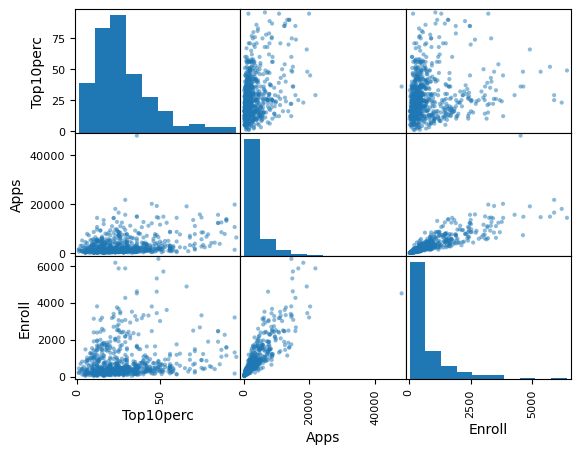

In [63]:
pd.plotting.scatter_matrix(college[['Top10perc', 'Apps', 'Enroll']]);

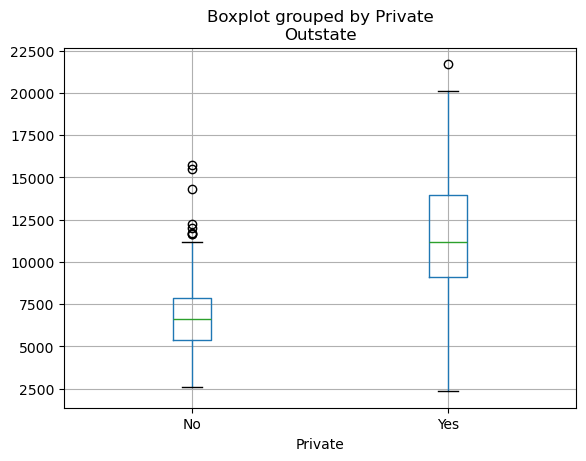

In [70]:
college.boxplot(column='Outstate', by='Private', grid='False');

In [80]:
college['Elite'] = pd.cut(college['Top10perc'],
                          [0, 50, 100],
                          labels=['No', 'Yes'])

In [82]:
college['Elite'].value_counts()

Elite
No     699
Yes     78
Name: count, dtype: int64